In [3]:
import numpy as np
import pandas as pd
import warnings; warnings.filterwarnings("ignore")

df_one_million_reddit_jokes = pd.read_csv('one-million-reddit-jokes.csv', names = ['type', 'id', 'subreddit.id', 'subreddit.name', 'subreddit.nsfw', 'created_utc', 'permalink', 'domain', 'url', 'selftext', 'title', 'score'])

print(df_one_million_reddit_jokes.head(3))

print('Loaded')

   type      id  subreddit.id  subreddit.name  subreddit.nsfw  created_utc  \
0  type      id  subreddit.id  subreddit.name  subreddit.nsfw  created_utc   
1  post  ftbp1i         2qh72           jokes           false   1585785543   
2  post  ftboup         2qh72           jokes           false   1585785522   

                                           permalink      domain  url  \
0                                          permalink      domain  url   
1  https://old.reddit.com/r/Jokes/comments/ftbp1i...  self.jokes  NaN   
2  https://old.reddit.com/r/Jokes/comments/ftboup...  self.jokes  NaN   

                                            selftext  \
0                                           selftext   
1  My corona is covered with foreskin so it is no...   
2                         It's called Google Sheets.   

                                               title  score  
0                                              title  score  
1               I am soooo glad I'm not circu

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# let's check the number of missing values per column
df_one_million_reddit_jokes.isnull().sum()

type                   0
id                     0
subreddit.id           0
subreddit.name         0
subreddit.nsfw         0
created_utc            0
permalink              0
domain                 0
url               995526
selftext            4475
title                  0
score                  0
dtype: int64

In [5]:
# remove all rows with no selftext
df_one_million_reddit_jokes = df_one_million_reddit_jokes[df_one_million_reddit_jokes.selftext != '[removed]'][df_one_million_reddit_jokes.selftext != '[deleted]']
df_one_million_reddit_jokes.isnull().sum()

type                   0
id                     0
subreddit.id           0
subreddit.name         0
subreddit.nsfw         0
created_utc            0
permalink              0
domain                 0
url               574165
selftext            4475
title                  0
score                  0
dtype: int64

In [6]:
df_one_million_reddit_jokes = df_one_million_reddit_jokes.loc[df_one_million_reddit_jokes['score'].apply(lambda x: str(x).isdigit())]
df_one_million_reddit_jokes['score'] = df_one_million_reddit_jokes['score'].astype(int)
df_one_million_reddit_jokes['title'] = df_one_million_reddit_jokes['title'].astype(str)

# Get average score per setup
#setup_score = df_one_million_reddit_jokes.groupby('title').score.mean()
df_jokes = df_one_million_reddit_jokes[['title', 'selftext', 'score']]

# Take a look at the top 25 setups
top100 = df_jokes.sort_values(by = 'score', ascending = False).head(100)
bot100 = df_jokes.sort_values(by = 'score', ascending = True).head(100) 

#print(top100)

# save to txt
np.savetxt('top100jokes.txt', top100[['title', 'selftext']], fmt = "%s")
np.savetxt('bot100jokes.txt', bot100[['title', 'selftext', 'score']], fmt = "%s")
    

In [7]:
## get top n & bot n jokes

top_n_jokes = df_jokes.sort_values(by = 'score', ascending = False).head(1000)
bot_n_jokes = df_jokes.sort_values(by = 'score', ascending = True).head(1000) 

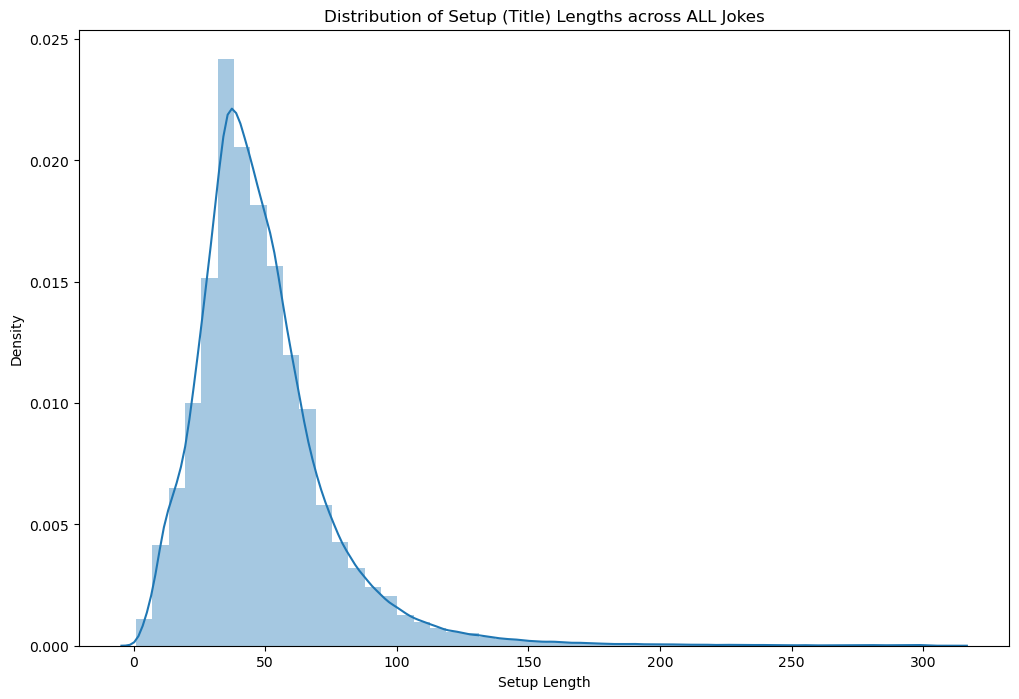

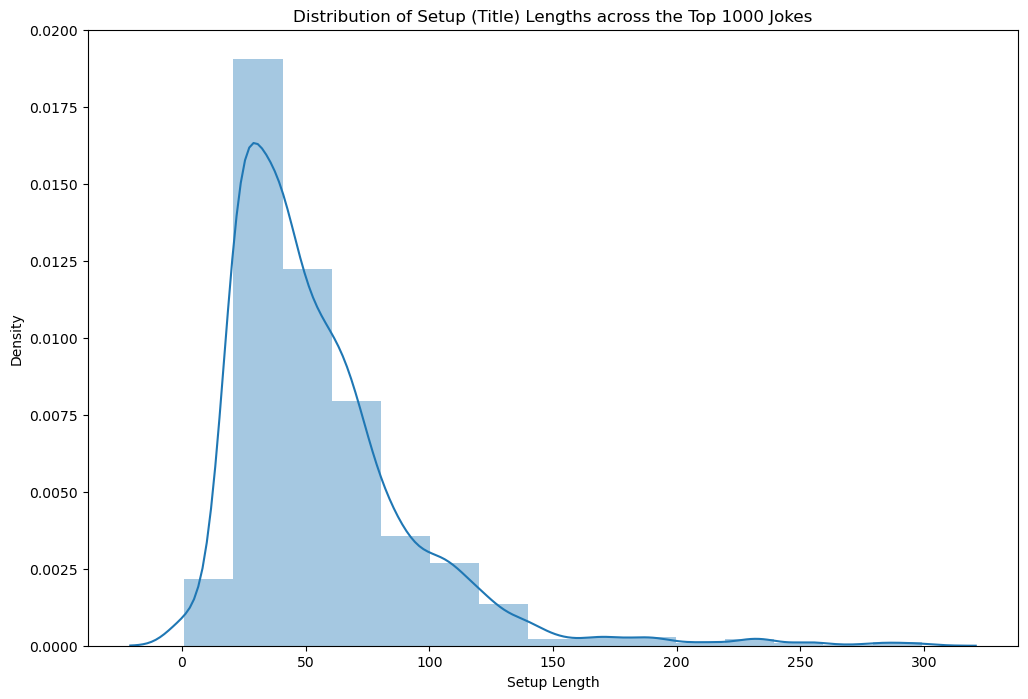

In [10]:
import matplotlib.pyplot as plt

# Plot setup length across all jokes
plt.figure(figsize = (12,8))
sns.distplot(df_one_million_reddit_jokes.title.str.len())
plt.title('Distribution of Setup (Title) Lengths across ALL Jokes')
plt.ylabel('Density')
plt.xlabel('Setup Length')
plt.show()

# Let's get a list of the top 100 setups & bottom 100 setups
top_setups = top_n_jokes.title.values
bot_setups = bot_n_jokes.title.values

# Plot setup length for the setups with the top 100 highest scores
plt.figure(figsize = (12,8))
sns.distplot(df_one_million_reddit_jokes[df_one_million_reddit_jokes.title.isin(top_setups)].title.str.len(), bins=15)
plt.title('Distribution of Setup (Title) Lengths across the Top 1000 Jokes')
plt.ylabel('Density')
plt.xlabel('Setup Length')
plt.show()

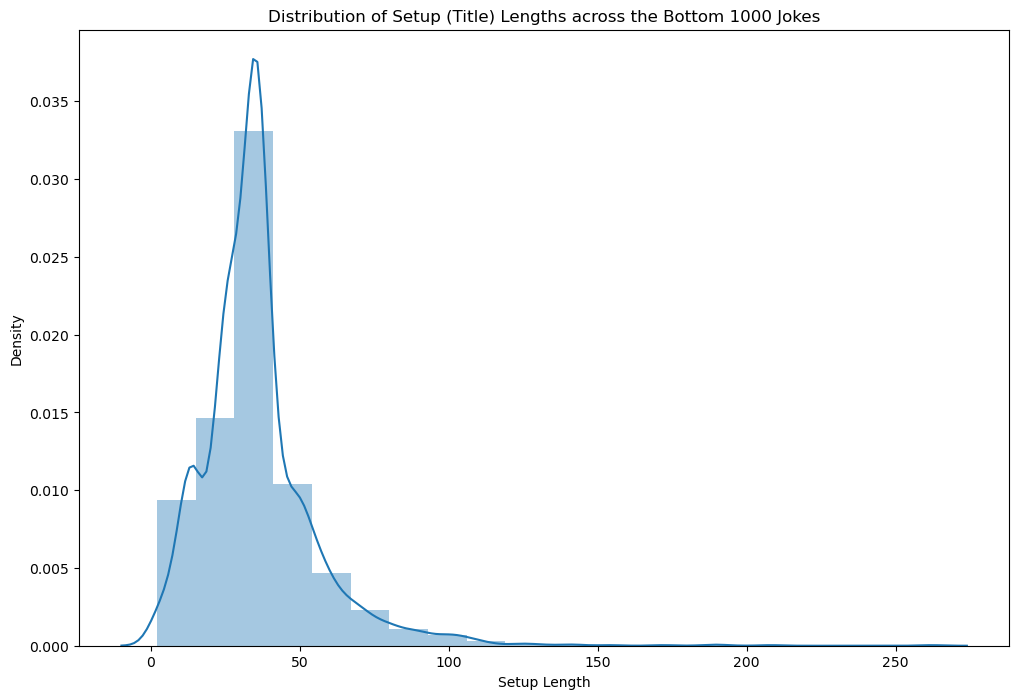

In [11]:
# Plot setup length for the setups with the bottom 100 scores
plt.figure(figsize = (12,8))
sns.distplot(df_one_million_reddit_jokes[df_one_million_reddit_jokes.title.isin(bot_setups)].title.str.len(), bins=20)
plt.title('Distribution of Setup (Title) Lengths across the Bottom 1000 Jokes')
plt.ylabel('Density')
plt.xlabel('Setup Length')
plt.show()

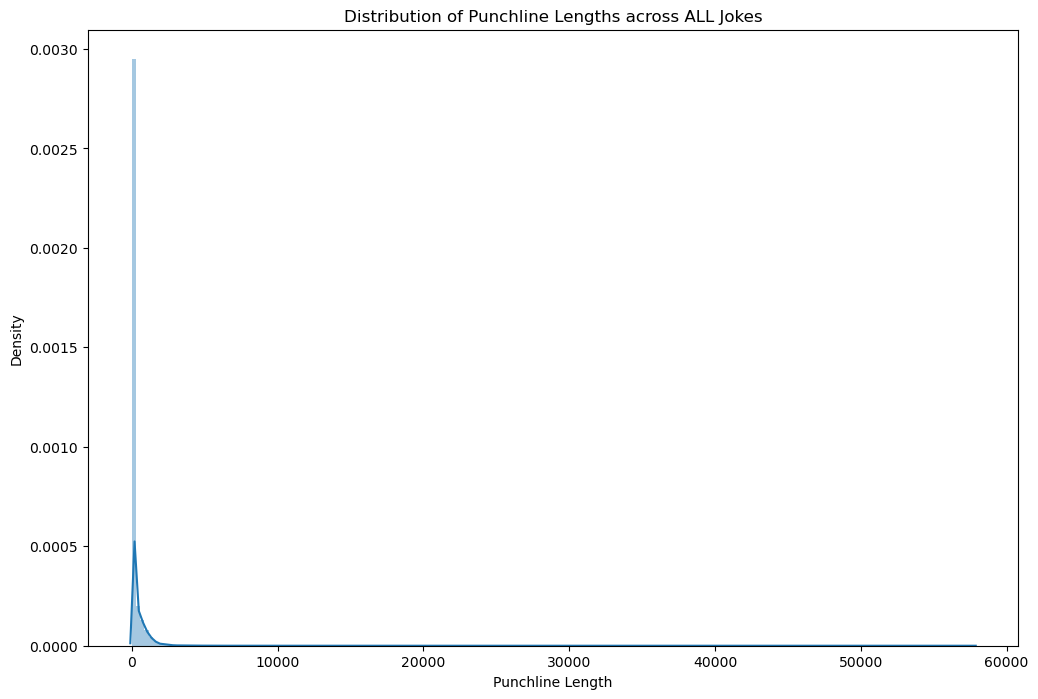

361.64028056112227
81.0
134.39455095862766
40.0


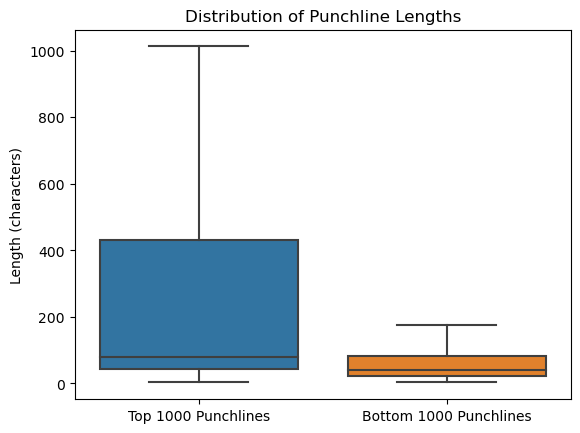

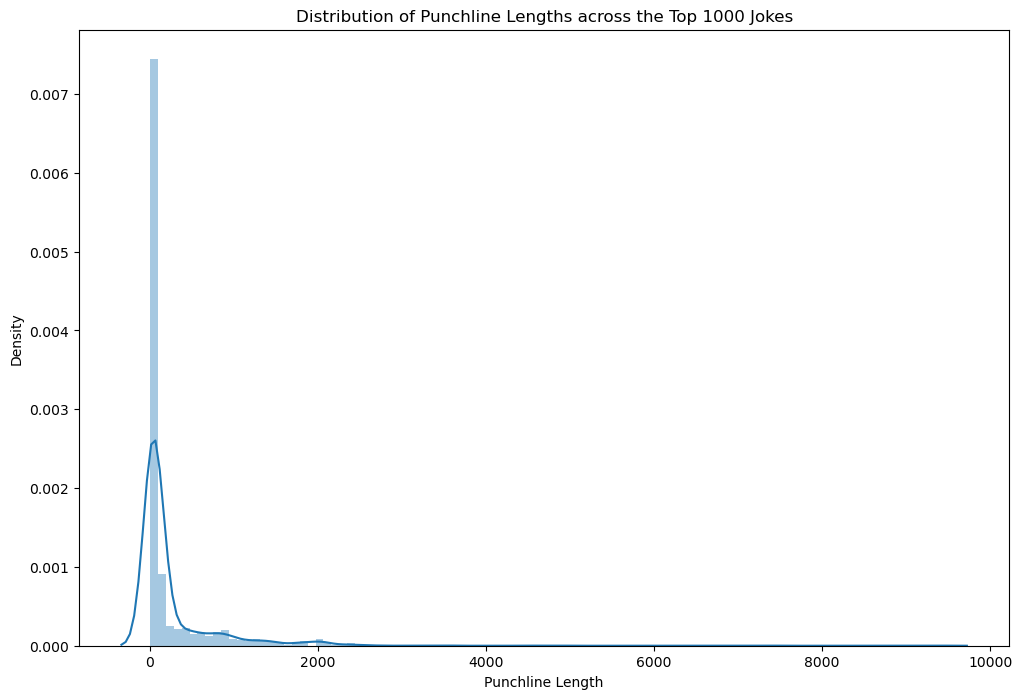

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot punchline length across all jokes
plt.figure(figsize = (12,8))
sns.distplot(df_one_million_reddit_jokes.selftext.str.len(), bins=200)
plt.title('Distribution of Punchline Lengths across ALL Jokes')
plt.ylabel('Density')
plt.xlabel('Punchline Length')
plt.show()

# Let's get a list of the top 100 setups & bottom 100 setups
top_punchlines = top_n_jokes.selftext.values
bot_punchlines = bot_n_jokes.selftext.values

print(top_n_jokes['selftext'].str.len().mean())
print(top_n_jokes['selftext'].str.len().median())
print(bot_n_jokes.selftext.str.len().mean())
print(bot_n_jokes.selftext.str.len().median())

df = pd.DataFrame({'Top 1000 Punchlines': top_n_jokes['selftext'].str.len(),
                   'Bottom 1000 Punchlines': bot_n_jokes['selftext'].str.len()
                  })

sns.boxplot(data=df, showfliers = False)
plt.title('Distribution of Punchline Lengths')
plt.ylabel('Length (characters)')
plt.show()

# Plot Punchline length for jokes with the top 1000 highest scores
plt.figure(figsize = (12,8))
sns.distplot(df_one_million_reddit_jokes[df_one_million_reddit_jokes.selftext.isin(top_punchlines)].selftext.str.len(), bins=100)
plt.title('Distribution of Punchline Lengths across the Top 1000 Jokes')
plt.ylabel('Density')
plt.xlabel('Punchline Length')
plt.show()

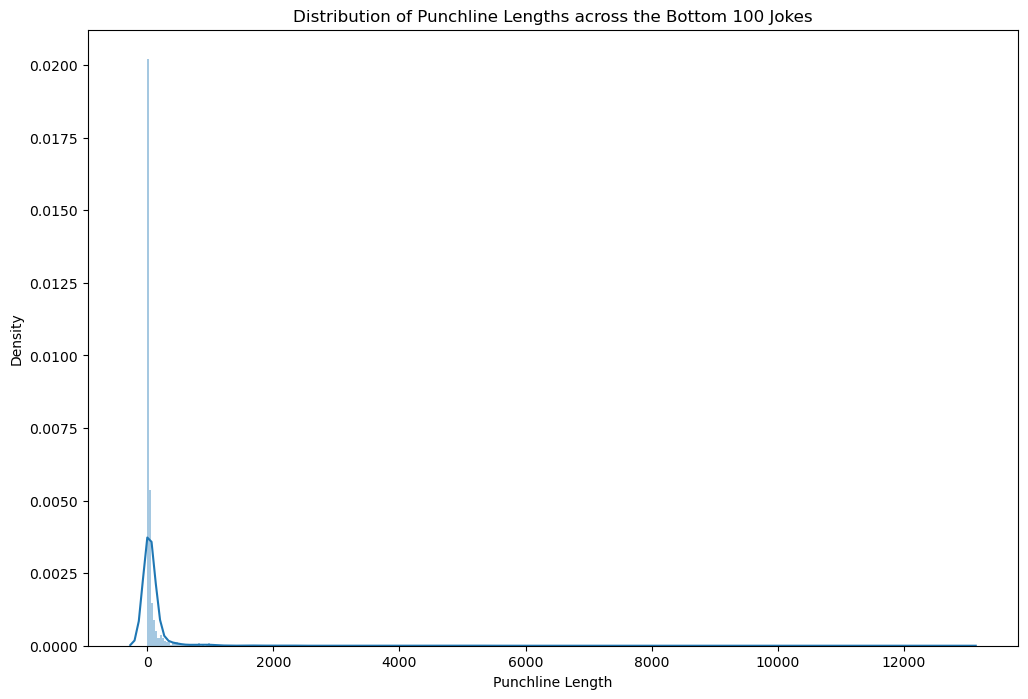

In [22]:
# Plot Punchline length for jokes with the bottom 1000 scores
plt.figure(figsize = (12,8))
sns.distplot(df_one_million_reddit_jokes[df_one_million_reddit_jokes.selftext.isin(bot_punchlines)].selftext.str.len(), bins=400)
plt.title('Distribution of Punchline Lengths across the Bottom 100 Jokes')
plt.ylabel('Density')
plt.xlabel('Punchline Length')
plt.show()

In [ ]:
print(df_one_million_reddit_jokes.head(100))

In [ ]:
import matplotlib.pyplot as plt

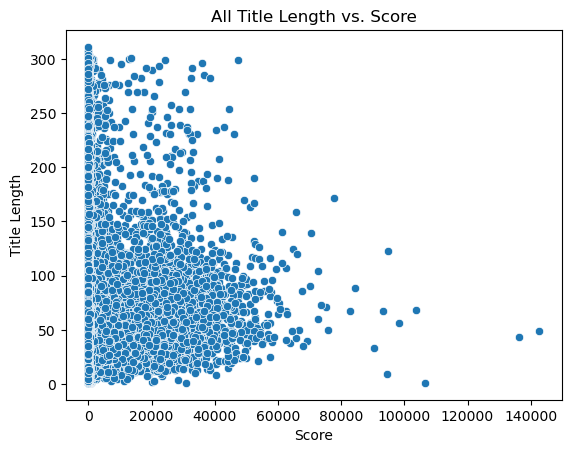

In [86]:
# ! pip3 install scipy
from scipy import stats
df_one_million_reddit_jokes['title_len'] = df_one_million_reddit_jokes.title.str.len()
df_outliers_removed = df_one_million_reddit_jokes[(np.abs(stats.zscore(df_one_million_reddit_jokes['title_len'])) < 2)]
sns.scatterplot(data=df_one_million_reddit_jokes, x='score', y='title_len')
plt.title('All Title Length vs. Score')
plt.xlabel('Score')
plt.ylabel('Title Length')
plt.show()

176.71221188445074


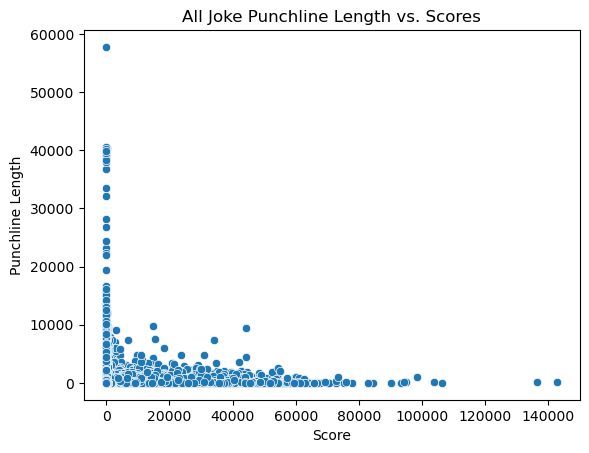

In [24]:
df_one_million_reddit_jokes['selftext_len'] = df_one_million_reddit_jokes.selftext.str.len()
print(df_one_million_reddit_jokes['selftext_len'].mean())
sns.scatterplot(data=df_one_million_reddit_jokes, x='score', y='selftext_len')
plt.title('All Joke Punchline Length vs. Scores')
plt.xlabel('Score')
plt.ylabel('Punchline Length')
plt.show()

In [167]:
import json

In [168]:
with open('words.json') as f:
    profanity = json.load(f)

In [169]:
profanity_set = set(profanity)

In [163]:
def check_profanity(string, profanity_set):
    for word in string.split():
        word = ''.join(filter(str.isalnum, word))
        if word in profanity_set:
            return True
    return False

In [51]:
# BAD WORDS
#!pip install better_profanity
from better_profanity import profanity
top_n_jokes = df_jokes.sort_values(by = 'score', ascending = False).head(10000)
bot_n_jokes = df_jokes.sort_values(by = 'score', ascending = True).head(10000) 

In [111]:
top_n_jokes['title_profanity_custom'] = list(map(lambda title: check_profanity(title, profanity_set), top_n_jokes['title']))
bot_n_jokes['title_profanity_custom'] = list(map(lambda title: check_profanity(title, profanity_set), bot_n_jokes['title']))

In [80]:
top_n_jokes['title_profanity'] = list(map(lambda title: profanity.contains_profanity(title), top_n_jokes['title']))
bot_n_jokes['title_profanity'] = list(map(lambda title: profanity.contains_profanity(title), bot_n_jokes['title']))

In [113]:
top_n_jokes['title_profanity_custom'].value_counts()

False    8675
True     1325
Name: title_profanity_custom, dtype: int64

In [115]:
bot_n_jokes['title_profanity_custom'].value_counts()

False    9127
True      873
Name: title_profanity_custom, dtype: int64

In [83]:
top_n_jokes['title_profanity'].value_counts()

False    8396
True     1604
Name: title_profanity, dtype: int64

In [84]:
bot_n_jokes['title_profanity'].value_counts()

False    8652
True     1348
Name: title_profanity, dtype: int64

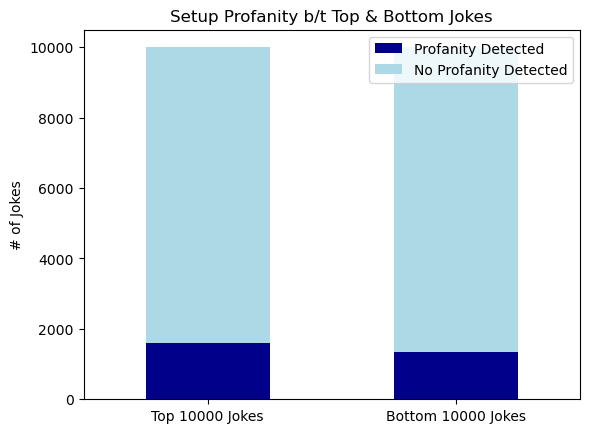

In [46]:
import matplotlib.pyplot as plt

students = pd.DataFrame({'Profanity Detected': [1604, 1348],
                         'No Profanity Detected': [8396, 8652], },
                        index=['Top 10000 Jokes', 'Bottom 10000 Jokes'])
 
 
# create stacked bar chart for students DataFrame
students.plot(kind='bar', stacked=True, color=['darkblue', 'lightblue'])
plt.title('Setup Profanity b/t Top & Bottom Jokes')
plt.ylabel('# of Jokes')
plt.xticks(rotation = 0)
plt.show()

In [85]:
top_n_jokes['punchline_profanity'] = list(map(lambda punchline: profanity.contains_profanity(punchline), top_n_jokes['selftext']))
bot_n_jokes['punchline_profanity'] = list(map(lambda punchline: profanity.contains_profanity(punchline), bot_n_jokes['selftext']))

In [86]:
top_n_jokes['punchline_profanity'].value_counts()

False    7117
True     2883
Name: punchline_profanity, dtype: int64

In [87]:
bot_n_jokes['punchline_profanity'].value_counts()

False    8112
True     1888
Name: punchline_profanity, dtype: int64

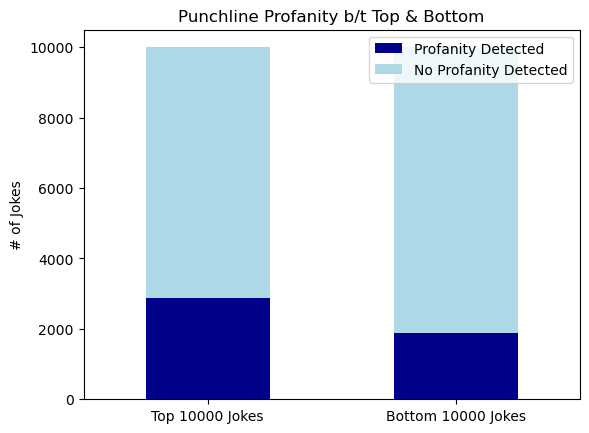

In [45]:
students = pd.DataFrame({'Profanity Detected': [2883, 1888],
                         'No Profanity Detected': [7117, 8112], },
                        index=['Top 10000 Jokes', 'Bottom 10000 Jokes'])
 
 
# create stacked bar chart for students DataFrame
students.plot(kind='bar', stacked=True, color=['darkblue', 'lightblue'])
plt.title('Punchline Profanity b/t Top & Bottom')
plt.ylabel('# of Jokes')
plt.xticks(rotation = 0)
plt.show()

In [152]:
display(top_n_jokes['title'].head(50)) 

29359     Sad News: The founder of /r/jokes has passed away
511071          Calm down about the Net Neutrality thing...
596219                                                    V
141893    If your surprised that Jeffrey Epstein commite...
329337    A new Navy recruit has his first day on the su...
463910    The only two white actors in Black Panther are...
498034                                            Ajit Pai.
108413    What did the reddit user say after detonating ...
763883                    The 2016 US Presidential Election
478415    Everyone in Hawaii is mad about the malfunctio...
510432    If I had a $ for every post I've seen today ab...
293380    Twenty years from now, kids are gonna think "B...
487660    I hate when people ask how I see myself in 3 y...
154711    If America is storming Area 51 then the Europe...
728460    This is the dirty joke my 85yo grandad told to...
529943    A Woman goes to buy a Parrot. The prices are $...
64010     Do you want to know why the re

In [199]:
def check_politics(string, wordlist):
    for word in string.lower().split():
        word = ''.join(filter(str.isalnum, word))
        if word in wordlist:
            return True
    return False

df_one_million_reddit_jokes['combinetext'] = df_one_million_reddit_jokes.title.str.cat(df_one_million_reddit_jokes.selftext) 

top_n_jokes = df_one_million_reddit_jokes.sort_values(by = 'score', ascending = False).head(50000)
bot_n_jokes = df_one_million_reddit_jokes.sort_values(by = 'score', ascending = True).head(50000) 

In [201]:
wordlist = ['trump', 'biden', 'senate', 'obama', 'kamala harris', 
            'democrat', 'democrats', 'liberal', 'liberals', 'conservatives', 
            'clinton', 'elizabeth warren', 'pelosi', 'AOC', 
           'anti-vax', 'politics', 'election', 'brexit', 'putin', 'charles schumer', 'net neutrality', 'legislation', 'supreme court', 'kavanaugh', 
            'united nations', 'steve cohen', 'equifax', 'janet yellen', 'kim jong-un', 'kim jongun', 'coup', 'Trans-Pacific', 'north korea', 'saudi arabia', 'global warming', 'trade war',
            'mike pence', 'xi jinping', 'EU', 'klobuchar', 'bernie sanders', 'george bush', 'ajit pai', 'president', 'senate', 'house of representatives',
            'black lives matter', 'blm', 'bill of rights', 'civil rights', 'human rights', 'propaganda', 'protest', 'vacc', 'vaxx'
           ]

top_n_jokes['politics']  = list(map(lambda text: check_politics(str(text), wordlist), top_n_jokes['combinetext']))
bot_n_jokes['politics']  = list(map(lambda text: check_politics(str(text), wordlist), bot_n_jokes['combinetext']))

In [196]:
top_n_jokes['politics'].value_counts()

False    9673
True      327
Name: politics, dtype: int64

In [197]:
bot_n_jokes['politics'].value_counts()

False    9664
True      336
Name: politics, dtype: int64

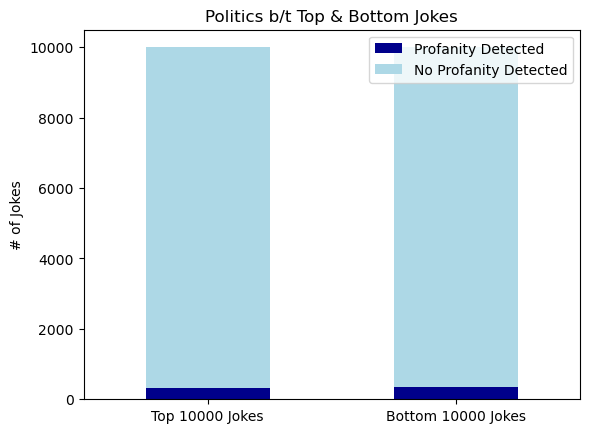

In [202]:
students = pd.DataFrame({'Profanity Detected': [327, 336],
                         'No Profanity Detected': [9673, 9664], },
                        index=['Top 10000 Jokes', 'Bottom 10000 Jokes'])
 
# create stacked bar chart for students DataFrame
students.plot(kind='bar', stacked=True, color=['darkblue', 'lightblue'])
plt.title('Politics b/t Top & Bottom Jokes')
plt.ylabel('# of Jokes')
plt.xticks(rotation = 0)
plt.show()

In [173]:
import datetime
your_timestamp = 1331856000000
date = datetime.datetime.fromtimestamp(your_timestamp / 1e3)

In [174]:
timestamps = df_one_million_reddit_jokes['created_utc'].astype(int)
df_one_million_reddit_jokes['converted_timestamp'] = list(map(lambda timestamp: datetime.datetime.fromtimestamp(int(timestamp)), timestamps))

df_one_million_reddit_jokes['year'] = list(map(lambda timestamp: datetime.datetime.fromtimestamp(int(timestamp)).year, timestamps))

df_one_million_reddit_jokes['converted_timestamp'].head(20)

1    2020-04-01 18:59:03
2    2020-04-01 18:58:42
3    2020-04-01 18:58:28
6    2020-04-01 18:41:01
9    2020-04-01 18:34:41
10   2020-04-01 18:32:45
11   2020-04-01 18:30:13
12   2020-04-01 18:28:34
15   2020-04-01 18:17:48
17   2020-04-01 18:17:12
18   2020-04-01 18:16:19
19   2020-04-01 18:13:18
20   2020-04-01 18:11:38
21   2020-04-01 18:10:58
23   2020-04-01 18:09:01
24   2020-04-01 18:08:57
26   2020-04-01 18:03:54
28   2020-04-01 18:02:49
29   2020-04-01 18:01:24
38   2020-04-01 17:44:15
Name: converted_timestamp, dtype: datetime64[ns]

In [175]:
df_one_million_reddit_jokes['title_politics']  = list(map(lambda title: check_profanity(title, wordlist), df_one_million_reddit_jokes['title']))

<AxesSubplot: xlabel='converted_timestamp', ylabel='score'>

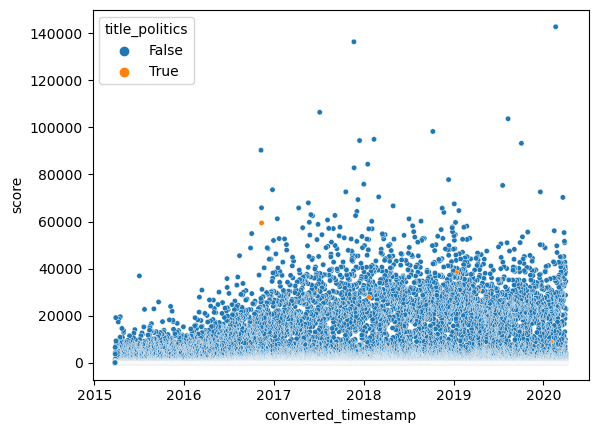

In [176]:
sns.scatterplot(data=df_one_million_reddit_jokes, x='converted_timestamp', y='score', s=15, hue='title_politics')

False    0.911778
True     0.088222
Name: title_profanity_custom, dtype: float64

False    0.913795
True     0.086205
Name: title_profanity_custom, dtype: float64

False    0.914196
True     0.085804
Name: title_profanity_custom, dtype: float64

False    0.914881
True     0.085119
Name: title_profanity_custom, dtype: float64

False    0.910948
True     0.089052
Name: title_profanity_custom, dtype: float64

False    0.915173
True     0.084827
Name: title_profanity_custom, dtype: float64

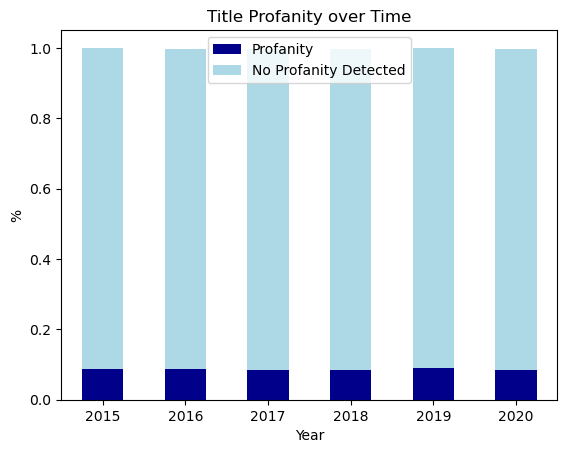

In [178]:
df_one_million_reddit_jokes['title_profanity_custom'] = list(map(lambda title: check_profanity(title, profanity_set), df_one_million_reddit_jokes['title']))
display(df_one_million_reddit_jokes.groupby('year').get_group(2015)['title_profanity_custom'].value_counts(normalize=True))
display(df_one_million_reddit_jokes.groupby('year').get_group(2016)['title_profanity_custom'].value_counts(normalize=True))
display(df_one_million_reddit_jokes.groupby('year').get_group(2017)['title_profanity_custom'].value_counts(normalize=True))
display(df_one_million_reddit_jokes.groupby('year').get_group(2018)['title_profanity_custom'].value_counts(normalize=True))
display(df_one_million_reddit_jokes.groupby('year').get_group(2019)['title_profanity_custom'].value_counts(normalize=True))
display(df_one_million_reddit_jokes.groupby('year').get_group(2020)['title_profanity_custom'].value_counts(normalize=True))

students = pd.DataFrame({'Profanity': [0.088222, 0.086205, 0.085804, 0.085119, 0.089052, 0.084827],
                         'No Profanity Detected': [0.911778, 0.911778, 0.911778, 0.911778, 0.911778, 0.911778], },
                        index=['2015', '2016', '2017', '2018', '2019', '2020'])

students.plot(kind='bar', stacked=True, color=['darkblue', 'lightblue'])
plt.title('Title Profanity over Time')
plt.ylabel('%')
plt.xlabel('Year')
plt.xticks(rotation = 0)
plt.show()

#sns.scatterplot(data=df_one_million_reddit_jokes, x='converted_timestamp', y='title_profanity_custom', s=15)

In [228]:
df_one_million_reddit_jokes['punchline_profanity_custom'] = list(map(lambda punch: check_profanity(str(punch), profanity_set), df_one_million_reddit_jokes['selftext']))
display(df_one_million_reddit_jokes.groupby('year').get_group(2015)['punchline_profanity_custom'].value_counts(normalize=True))
display(df_one_million_reddit_jokes.groupby('year').get_group(2016)['punchline_profanity_custom'].value_counts(normalize=True))
display(df_one_million_reddit_jokes.groupby('year').get_group(2017)['punchline_profanity_custom'].value_counts(normalize=True))
display(df_one_million_reddit_jokes.groupby('year').get_group(2018)['punchline_profanity_custom'].value_counts(normalize=True))
display(df_one_million_reddit_jokes.groupby('year').get_group(2019)['punchline_profanity_custom'].value_counts(normalize=True))
display(df_one_million_reddit_jokes.groupby('year').get_group(2020)['punchline_profanity_custom'].value_counts(normalize=True))

### NOT CODED YET ###
# students = pd.DataFrame({'Profanity': [0.113206,  0.107961, 0.106876, 0.104277, 0.107154, 0.10086],
#                          'No Profanity Detected': [0.886794, 0.892039, 0.893124, 0.895723, 0.892846, 0.89914], },
#                         index=['2015', '2016', '2017', '2018', '2019', '2020'])

# students.plot(kind='bar', stacked=True, color=['lightblue', 'plum'])
# plt.title('Title Profanity over Time')
# plt.ylabel('%')
# plt.xticks(rotation = 0)
# plt.show()

False    0.832439
True     0.167561
Name: punchline_profanity_custom, dtype: float64

False    0.838522
True     0.161478
Name: punchline_profanity_custom, dtype: float64

False    0.844997
True     0.155003
Name: punchline_profanity_custom, dtype: float64

False    0.848387
True     0.151613
Name: punchline_profanity_custom, dtype: float64

False    0.852724
True     0.147276
Name: punchline_profanity_custom, dtype: float64

False    0.857427
True     0.142573
Name: punchline_profanity_custom, dtype: float64

<AxesSubplot: xlabel='year', ylabel='score'>

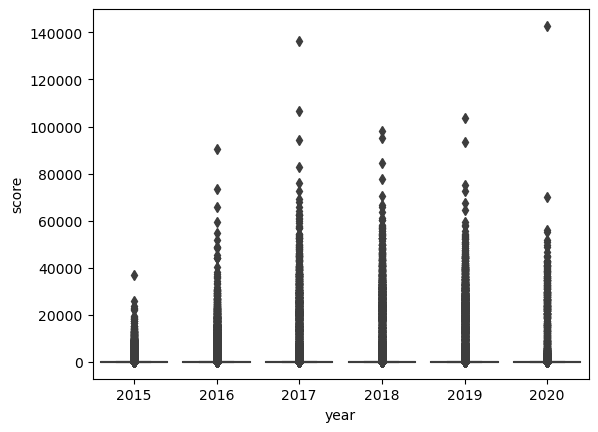

In [199]:
sns.boxplot(x = 'year', y='score', data = df_one_million_reddit_jokes)

<AxesSubplot: xlabel='converted_timestamp', ylabel='selftext_len'>

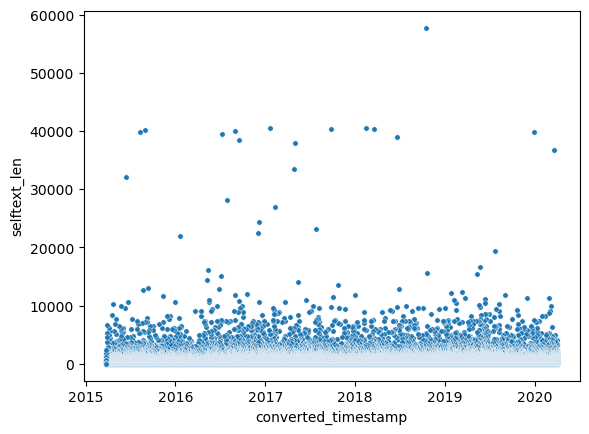

In [196]:
sns.scatterplot(data=df_one_million_reddit_jokes, x='converted_timestamp', y='selftext_len', s=15)

In [ ]:
import tensorflow as tf
!pip install -q gpt-2-simple
import gpt_2_simple as gpt2
from datetime import datetime
from google.colab import files

In [ ]:
from google.colab import drive
drive.mount('/content/drive')